# **Data Mining & Foundations of AI (Assessment 1)**
# **Module: 6CC555**

# **Student ID: 100540796** 

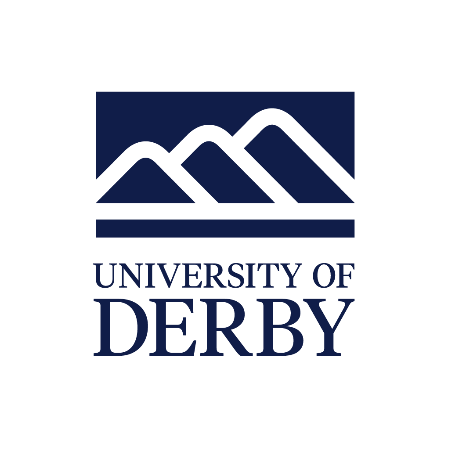

---

# **Healthcare Diabetes Prediction**
**Analysis Problem**
To find an accurate Machine Learning-Based Analytical Model for the Early Identification of Diabetes Risk Factors in Patients.
**Diabetes Dataset Chosen**
[diabetes dataset](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes)
# **Introduction**

Diabetes is a chronic disease that is distinguished by elevated levels of blood sugar (World Health Organization, 2024). In this assignment, the aim is to analyse and explore the provided [diabetes dataset](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes) within the file Healthcare-Diabetes.csv to understand the various relationships between the different health indicators and the outcome of diabetes. The assignments focus on exploratory data analysis will help provide an understanding of the available dataset's indicator characteristics for the analysis of predictive models for diabetes outcomes.

With the increase in diabetes cases worldwide the idea of analysing predictive models for identifying if an individual has the disease or not or is at risk of diabetes is very important. By utilising machine learning techniques, especially decision tree and random forest-based models we can identify diabetes outcomes based on the various dataset indicators and what model is best suited to accurately identifying diabetes from these characteristics. 

# **Dataset Description**

The diabetes prediction dataset provided offers a vast collection of health-related attributes which are crucial for diabetes risk assessment and prediction:

* **Pregnancies:** Number of times pregnant.
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
* **BloodPressure:** Diastolic blood pressure (mm Hg).
* **SkinThickness:** Triceps skinfold thickness (mm).
* **Insulin:** 2-Hour serum insulin (mu U/ml).
* **BMI:** Body mass index (weight in kg / height in m^2).
* **DiabetesPedigreeFunction:** Diabetes pedigree function, a genetic score of diabetes.
* **Age:** Age in years.
* **Outcome:** Binary classification indicating the presence (1) or absence (0) of diabetes.

---


   # **Libraries Importing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

**Displaying dataset rows, visualising dataset itself**
Importing datset from Healthcare-Diabetes.csv file

In [2]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('Healthcare-Diabetes.csv')

# Set the 'Id' column as the index
df.set_index('Id', inplace=True)

# Display the DataFrame
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31.0,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


---
# **Missing data**
From quickly viewing the dataset I notice there are quite a few '0' rows for each different column type. For columns where '0' values are present this is likely to be invalid or missing data (such as 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'), it's important to handle these values appropriately before proceeding with further analysis. To evaluate how many columns have '0' values, I conducted a check to see how many '0's per column.

In [3]:
# Create a dictionary to store the count of '0' entries for each column
zero_counts = {}

# Iterate over each column (except 'Outcome')
for col in df.columns:
    if col != 'Outcome':
        # Count the number of '0' entries in the column
        zero_counts[col] = (df[col] == 0).sum()

# Convert the dictionary to a DataFrame
zero_counts_df = pd.DataFrame.from_dict(zero_counts, orient='index', columns=['Zero Count'])

# Display the DataFrame
print(zero_counts_df)

                          Zero Count
Pregnancies                      412
Glucose                           18
BloodPressure                    125
SkinThickness                    800
Insulin                         1330
BMI                               39
DiabetesPedigreeFunction           0
Age                                0


**Analysis result**
The results highlight the count of '0' entries in various columns of the dataset, notably in 'Insulin' and 'SkinThickness' with 1330 and 800 occurrences. These high counts are biologically implausible, suggesting missing or erroneous data. By utilising K-nearest neighbors (KNN) we can fill in the missing data as KNN considers the relationships between variables, making it more suitable for complex datasets like medical records. By leveraging the similarity of neighboring data points KNN can provide more accurate imputations, ensuring the integrity of the dataset for robust analysis and modeling (Beretta & Santaniello, 2016; Little & Rubin, 2002; Troyanskaya et al., 2001).

**Insulin integrity**
It has been highlighted that insulin has 1330 rows with a '0' value inputted which is a significant amount of data missing. Insulin is a key variable in diabetes prediction and missing data introduces bias, potentially misleading model outcomes (Batista and Monard, 2003). When a significant proportion of data is missing imputation methods like K-nearest neighbors (KNN) could lead to inaccurate estimations which affects model reliability (García, Luengo, and Herrera, 2015). Therefore, removing insulin from the model ensures it will be trained using high-quality representative data.

**SkinThickness integrity**
From the analysis nearly 29% of 'SkinThickness' values are missing from the dataset. Recognising the potential of 'SkinThickness' as a significant predictor for diabetes, so I am continuing to employ KNN imputation instead of just deleting the entire record.

In [4]:
# Columns to impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Copy the DataFrame to avoid modifying the original data
df_imputed = df.copy()

# Replace '0' values with NaN in the columns to be imputed
df_imputed[columns_to_impute] = df_imputed[columns_to_impute].replace(0, np.nan)

# Impute missing values using KNN imputation
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

# Drop the 'Insulin' column from the DataFrame
df_imputed = df_imputed.drop(columns=['Insulin'])

# Count the number of '0' entries for each column (except 'Outcome')
zero_counts_df = pd.DataFrame({col: (df_imputed[col] == 0).sum() for col in df_imputed.columns if col != 'Outcome'}, index=['Zero Count']).T

# Display the DataFrame
print(zero_counts_df)

                          Zero Count
Pregnancies                      412
Glucose                            0
BloodPressure                      0
SkinThickness                      0
BMI                                0
DiabetesPedigreeFunction           0
Age                                0


As you can see from the above display only pregnancies has a 412 zero count as this is plausible data which means no further action is required and that the data is now ready for analysis.

---
# **Dataset exploration**
Basic information about dataset, first few rows of the dataset including columns Pregnancies, Glucose, BloodPressure, SkinThickness, BMI, DiabetesPedigreeFunction, Age and Outcome. As visualised below, apart from pregnancies having 0, there is no missing data present.

In [5]:
# Display the first few rows of the dataset
print(df_imputed.head())

    Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
Id                                                             
1             6    148.0           72.0           35.0  33.6   
2             1     85.0           66.0           29.0  26.6   
3             8    183.0           64.0           32.8  23.3   
4             1     89.0           66.0           23.0  28.1   
5             0    137.0           40.0           35.0  43.1   

    DiabetesPedigreeFunction  Age  Outcome  
Id                                          
1                      0.627   50        1  
2                      0.351   31        0  
3                      0.672   32        1  
4                      0.167   21        0  
5                      2.288   33        1  


Dataset columns and row quantity

In [6]:
# Get a summary of the dataset
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 1 to 2768
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   float64
 2   BloodPressure             2768 non-null   float64
 3   SkinThickness             2768 non-null   float64
 4   BMI                       2768 non-null   float64
 5   DiabetesPedigreeFunction  2768 non-null   float64
 6   Age                       2768 non-null   int64  
 7   Outcome                   2768 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 194.6 KB
None


Checking if there is any missing data, any columns with missing row data.

In [7]:
# Check for missing values
print(str(df_imputed.isnull().sum()).replace('dtype: int64', '').strip())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0


The output below provides statistical summaries for numerical variables. Average pregnancies: 3.74, glucose: 121.10 mg/dL, blood pressure: 69.13 mm Hg. Skin thickness: 20.82 mm, insulin: 80.13 mu U/ml, BMI: 32.14 kg/m^2. Diabetes pedigree function: 0.47, age: 33.13 years. The 'Outcome' variable indicates diabetes presence in 34.39% of cases.

In [8]:
# Summary statistics of numerical columns
print(df_imputed.describe())

       Pregnancies      Glucose  BloodPressure  SkinThickness          BMI  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.912283      72.383960      28.827023    32.577066   
std       3.323801    30.559498      12.166355      10.190419     7.132311   
min       0.000000    44.000000      24.000000       7.000000    18.200000   
25%       1.000000    99.000000      64.000000      22.000000    27.500000   
50%       3.000000   117.000000      72.000000      28.700000    32.300000   
75%       6.000000   141.000000      80.000000      35.200000    36.800000   
max      17.000000   199.000000     122.000000     110.000000    80.600000   

       DiabetesPedigreeFunction          Age      Outcome  
count               2768.000000  2768.000000  2768.000000  
mean                   0.471193    33.132225     0.343931  
std                    0.325669    11.777230     0.475104  
min                    0.078000    21.000000     0.000000

---
## Outcome visualisation of diabetes cases
0 being no-diabetic and 1 being diabetic.

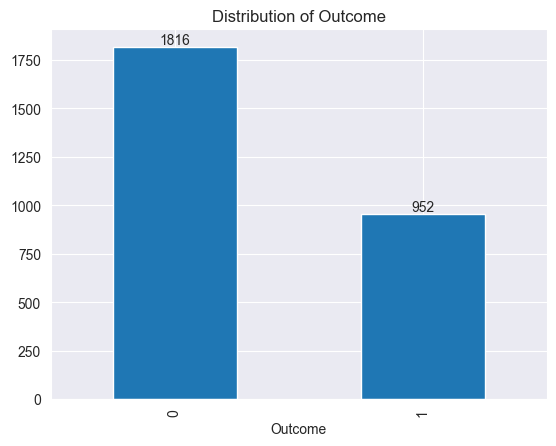

In [9]:
# Visualise the distribution of diabetes outcome
# Plot the bar chart
ax = df_imputed['Outcome'].value_counts().plot(kind='bar')

# Add data labels to the bars
for i, value in enumerate(df_imputed['Outcome'].value_counts()):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Set the title
plt.title('Distribution of Outcome')

# Show the plot
plt.show()

# Visualisation of Outcome
The result of the outcome distribution bar chart highlights that 1816 results are for no diabetes (0) and 952 for diabetes (1), I will be keeping these results as they are and won't be balancing them. This is because I want to keep the outcome as a real-world representation to keep the original distribution. This is important as it ensures that the model is trained on data that accurately reflects the prevalence of diabetes in the population.

---

# **Exploring all types of relationships across the entire data set**

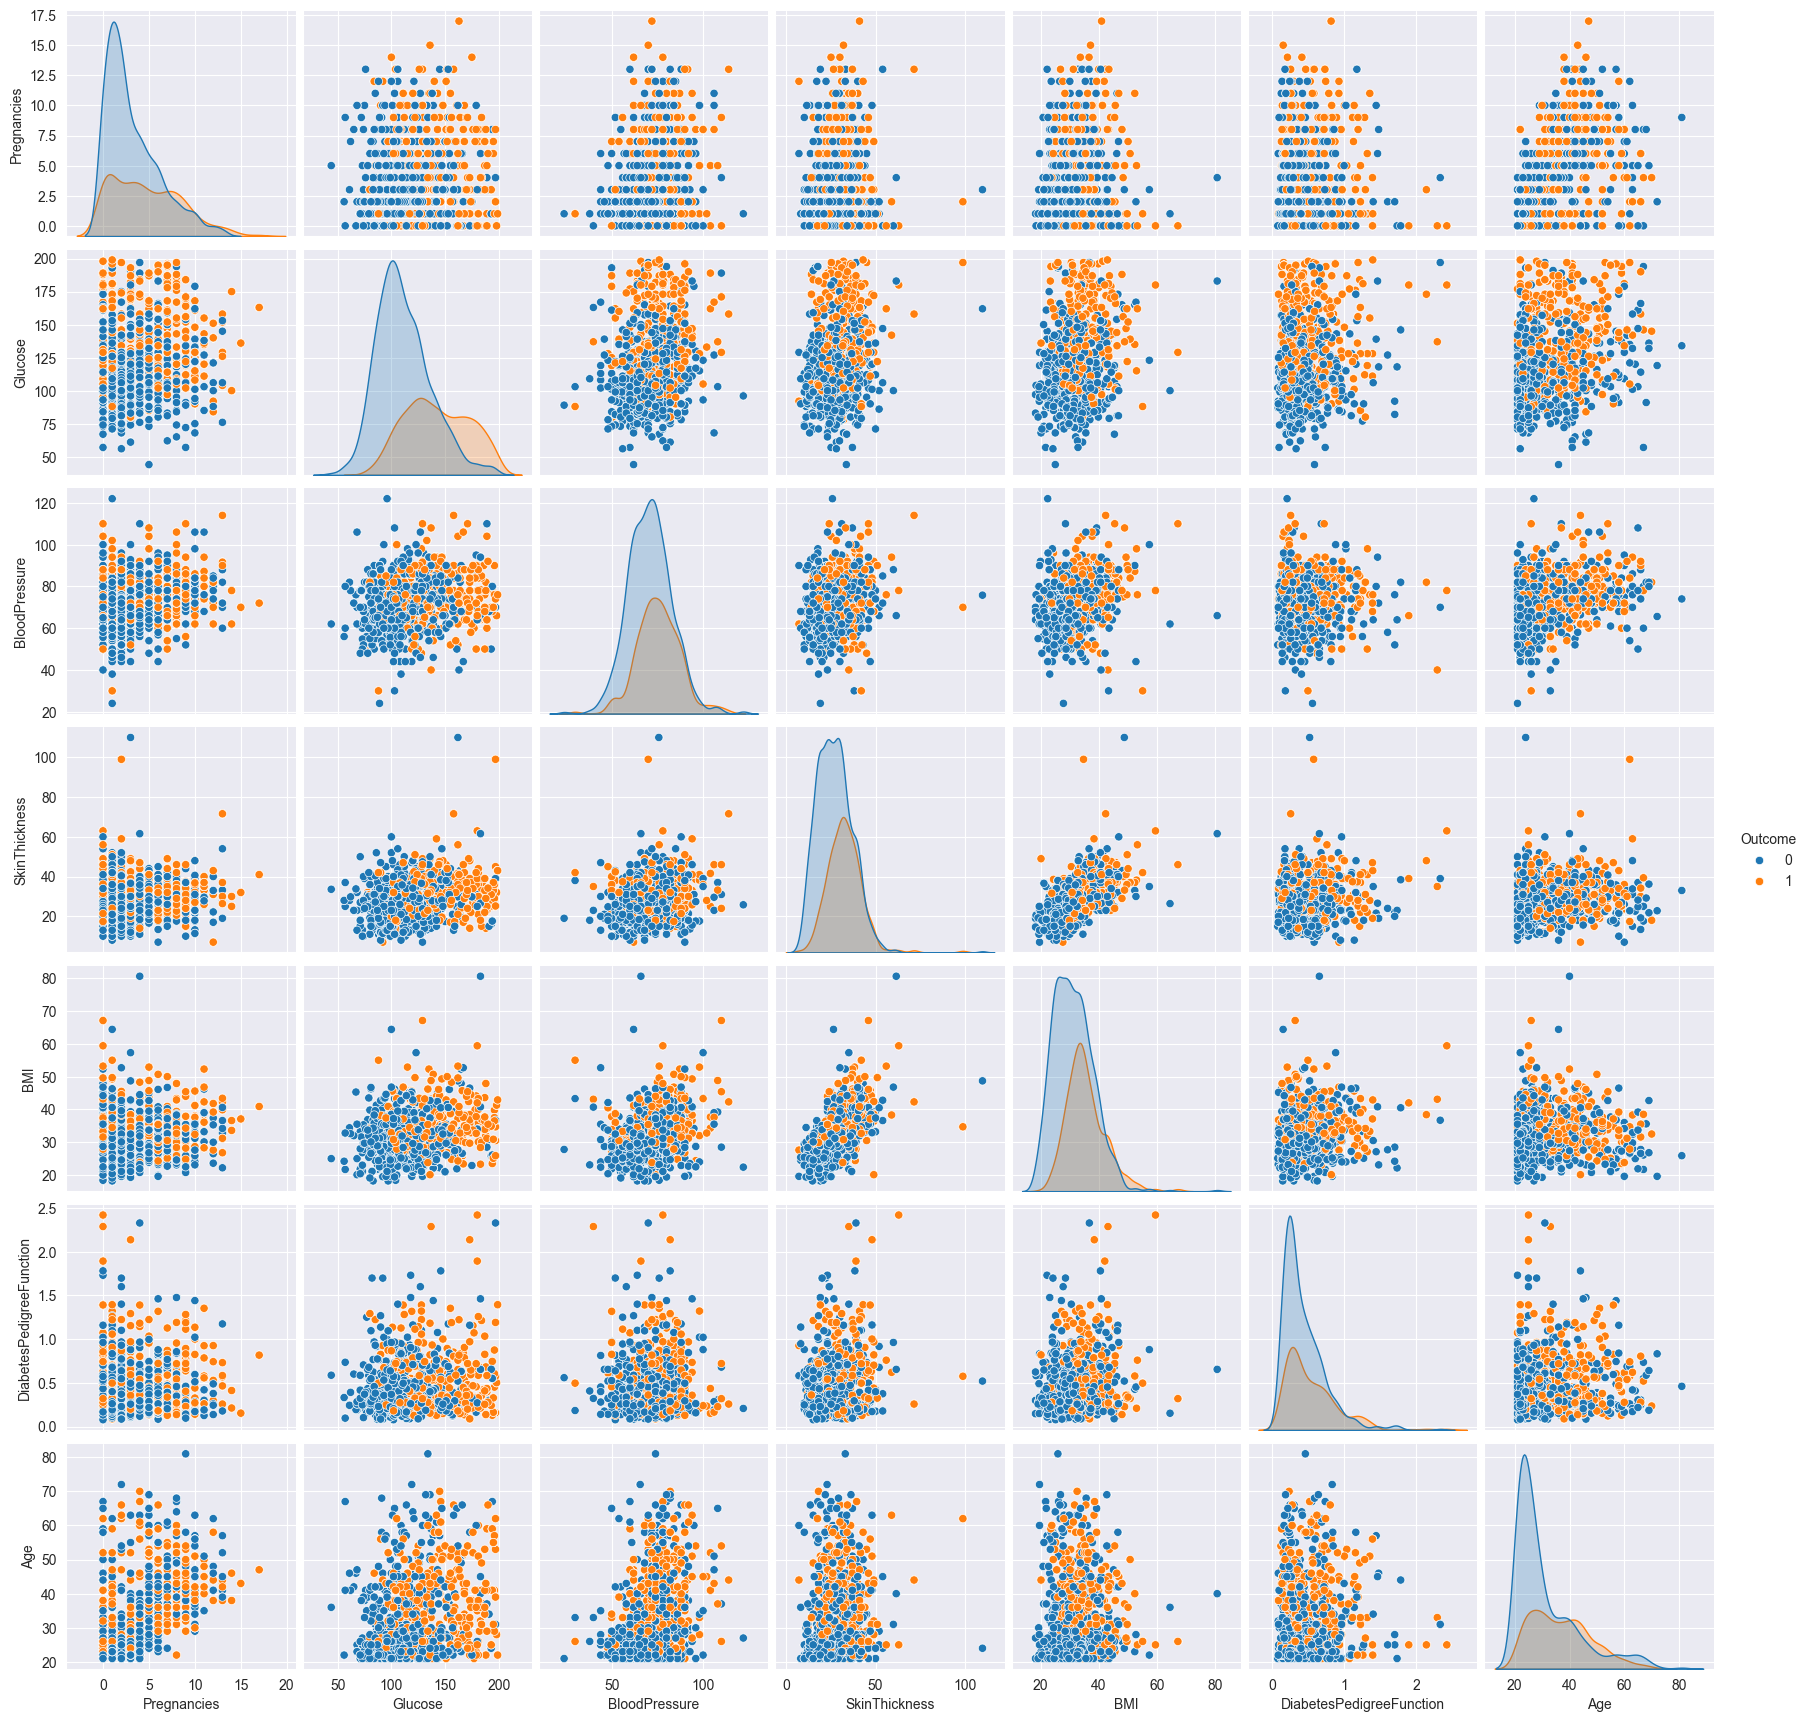

In [10]:
numeric_cols = df_imputed.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df_imputed[numeric_cols], hue='Outcome', diag_kind='kde')


---
# Correlation Matrix

The following visualisation of a correlation matrix below highlights the relationships between the different diabetes indicator characteristics within the dataset. Within the matrix, each cell displays the correlation coefficient between two variables these range from a value of -1 to 1.

- 1 indicates a perfect positive correlation, meaning when one variable increases so does the other.

- -1 indicates a perfect negative correlation, where one variable increases as the other decreases.

- 0 indicates no correlation between the variables.

Visualising the matrix clearly shows the pairs of variables that are positively and negatively correlated, or not correlated at all. This information is crucial for understanding how different health indicators interact and influence the likelihood of diabetes in the dataset.


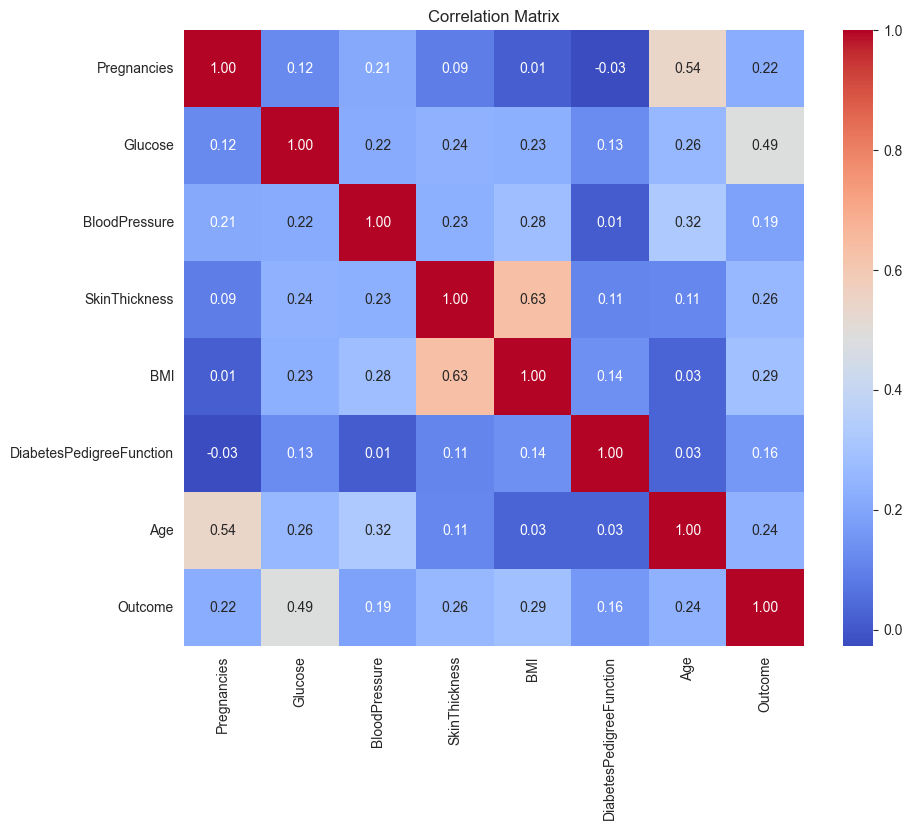

In [11]:
# Visualise the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

---
# Graphical visualisations of key dataset correlations:

**Histograms and Scatter Plots** 

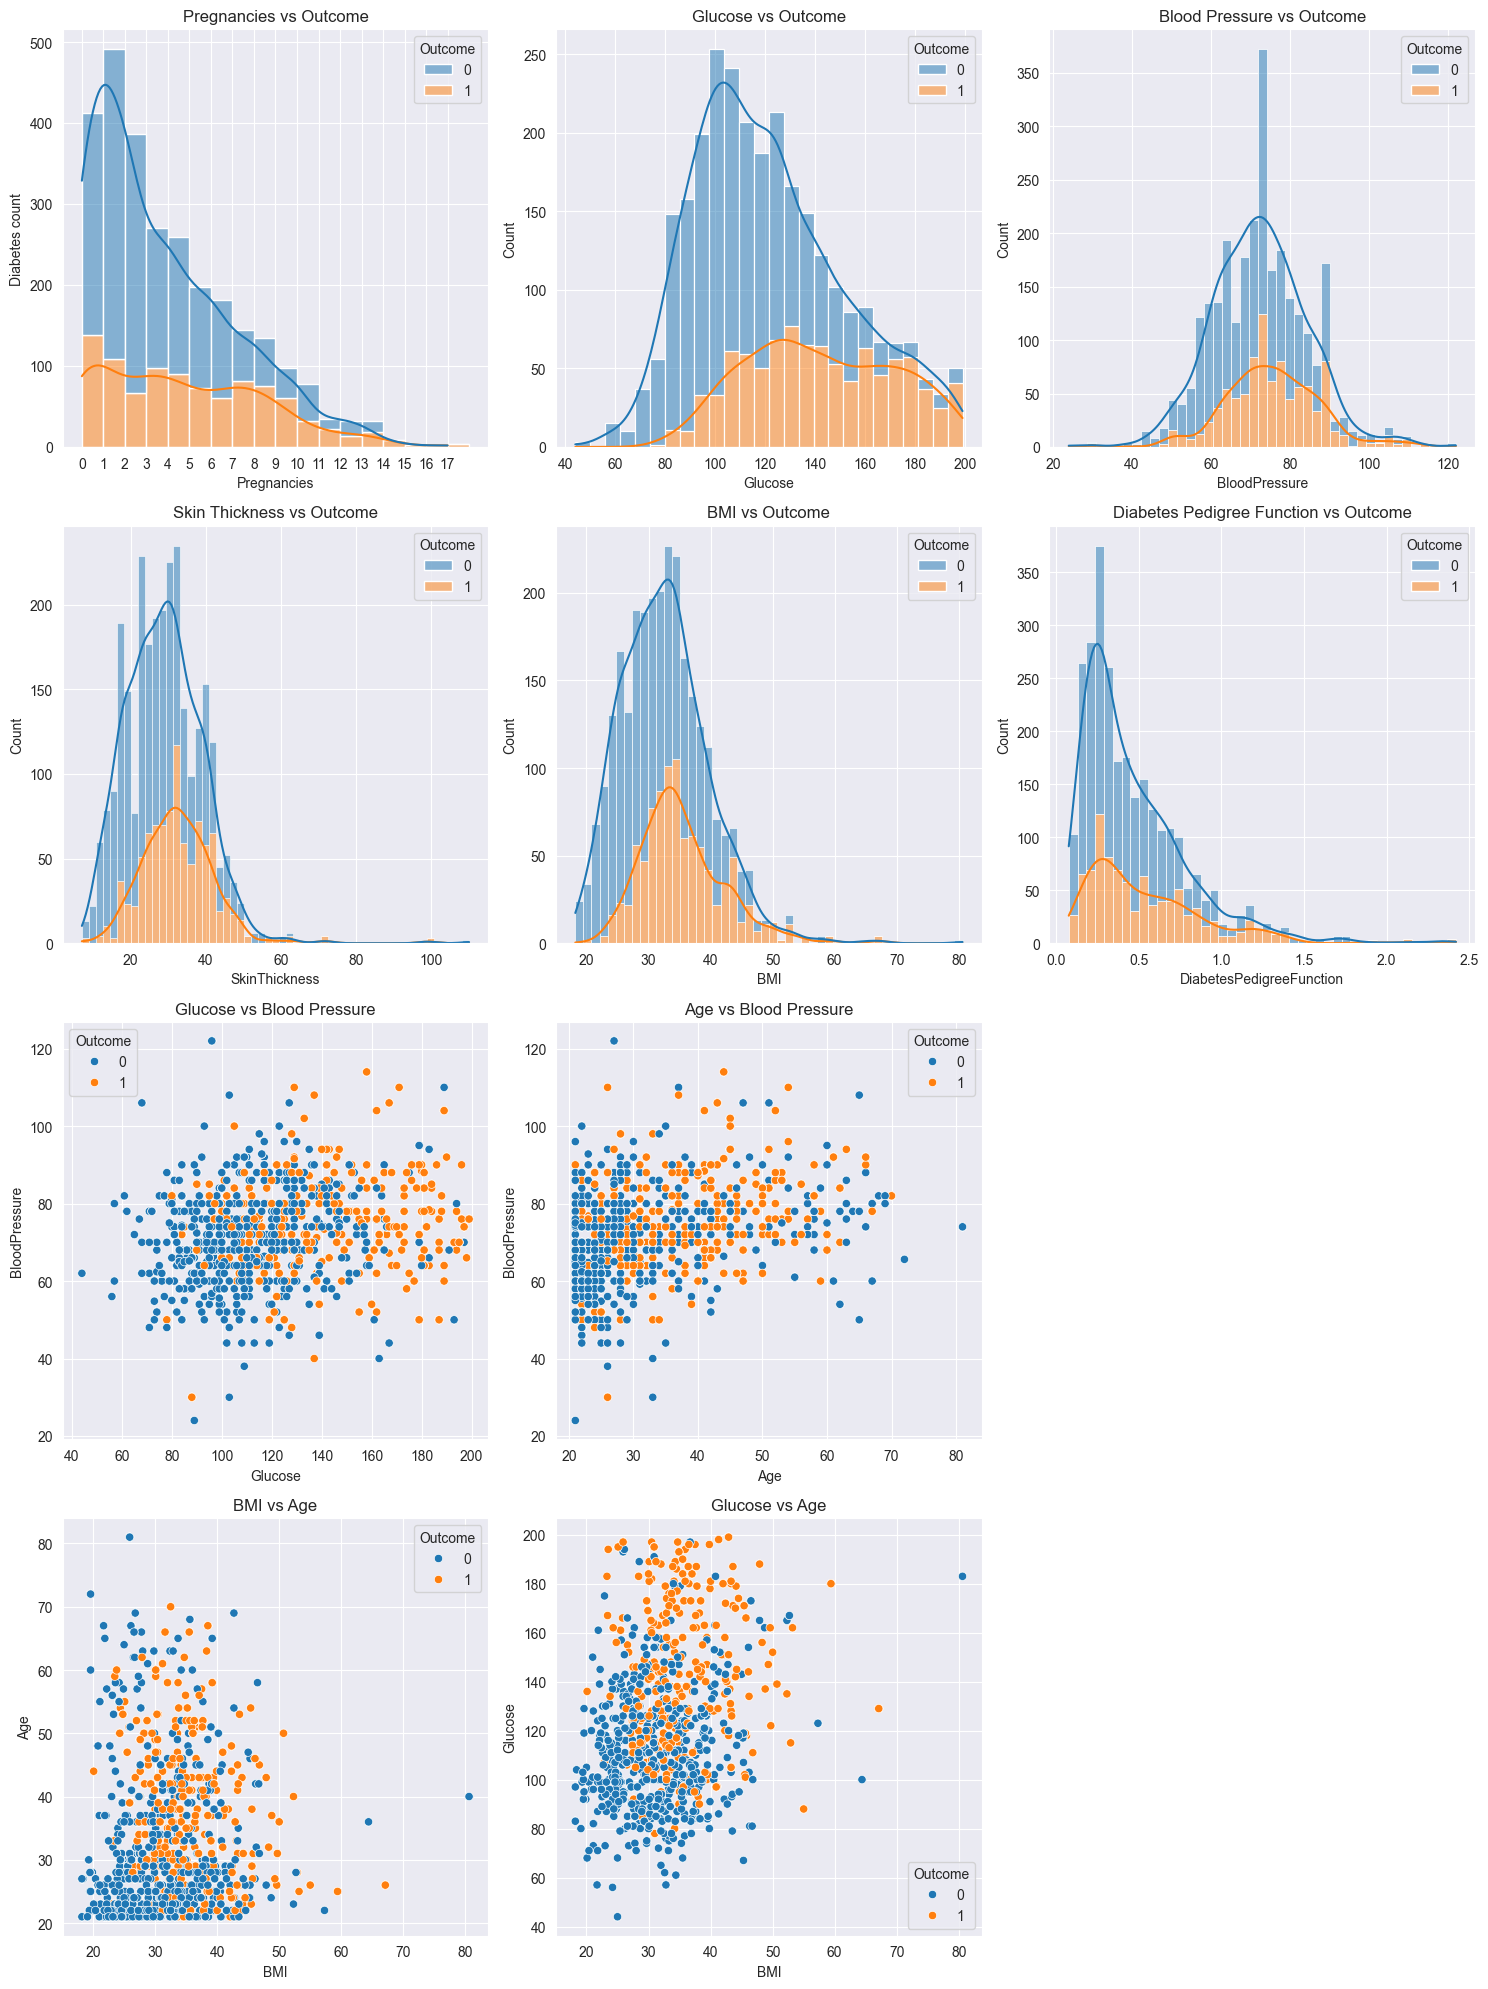

In [12]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Histograms for numerical features
# Pregnancy vs Outcome
sns.histplot(data=df_imputed, x='Pregnancies', hue='Outcome', multiple='stack', ax=axs[0, 0], kde=True, bins=range(df_imputed['Pregnancies'].min(), df_imputed['Pregnancies'].max() + 2))
axs[0, 0].set_title('Pregnancies vs Outcome')
axs[0, 0].set_xticks(range(df_imputed['Pregnancies'].min(), df_imputed['Pregnancies'].max() + 1))
axs[0, 0].set_ylabel('Diabetes count')

# Glucose vs Outcome
sns.histplot(data=df_imputed, x='Glucose', hue='Outcome', multiple='stack', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Glucose vs Outcome')

# Blood Pressure vs Outcome
sns.histplot(data=df_imputed, x='BloodPressure', hue='Outcome', multiple='stack', ax=axs[0, 2], kde=True)
axs[0, 2].set_title('Blood Pressure vs Outcome')

# Skin Thickness vs Outcome
sns.histplot(data=df_imputed, x='SkinThickness', hue='Outcome', multiple='stack', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Skin Thickness vs Outcome')

# BMI vs Outcome
sns.histplot(data=df_imputed, x='BMI', hue='Outcome', multiple='stack', ax=axs[1, 1], kde=True)
axs[1, 1].set_title('BMI vs Outcome')

# Diabetes Pedigree Function vs Outcome
sns.histplot(data=df_imputed, x='DiabetesPedigreeFunction', hue='Outcome', multiple='stack', ax=axs[1, 2], kde=True)
axs[1, 2].set_title('Diabetes Pedigree Function vs Outcome')

# Scatter plot for numerical features
# Glucose vs Blood Pressure
sns.scatterplot(data=df_imputed, x='Glucose', y='BloodPressure', hue='Outcome', ax=axs[2, 0])
axs[2, 0].set_title('Glucose vs Blood Pressure')

# Age vs Blood Pressure
sns.scatterplot(data=df_imputed, x='Age', y='BloodPressure', hue='Outcome', ax=axs[2, 1])
# Create a figure with multiple subplots
axs[2, 1].set_title('Age vs Blood Pressure')

# Age vs BMI
sns.scatterplot(data=df_imputed, x='BMI', y='Age', hue='Outcome', ax=axs[3, 0])
# Create a figure with multiple subplots
axs[3, 0].set_title('BMI vs Age')

# Glucose vs BMI
sns.scatterplot(data=df_imputed, x='BMI', y='Glucose', hue='Outcome', ax=axs[3, 1])
# Create a figure with multiple subplots
axs[3, 1].set_title('Glucose vs Age')

# Remove the empty subplots
for ax in axs[2, 2:]:
    ax.remove()
for ax in axs[3, 2:]:
    ax.remove()

plt.tight_layout()
plt.show()


# Graph Observations and Conclusion
**Histograms:**
These graphs compare the distribution of various health indicators — Glucose, Blood Pressure, Skin Thickness, BMI, and Diabetes Pedigree Function — against the diabetes outcome (positive or negative) in a dataset. Each graph uses a stacked histogram with a kernel density estimate to show how these factors correlate with the presence or absence of diabetes.

**Scatter graphs:**
Combining dataset attributes, such as Glucose vs Blood Pressure, Age vs Blood Pressure, Age vs BMI, and Glucose vs BMI, enables the identification of multifactorial relationships influencing diabetes risk.

**Glucose vs Blood Pressure:**
Observing the scatter graph, the combination of increasing glucose levels with blood pressure against the outcome of diabetes reveals a positive pattern where higher values in both metrics correlate with a higher likelihood of a positive diabetes outcome. As glucose and blood pressure increase together, likelihood of not having diabetes rises; however high glucose levels  suggests an increased diabetes risk. These findings align with what Simental-Mendía et al. (2008) and Skyler et al. (2009) have found through extensive research, emphasising the combined effect these factors have on the risk of diabetes.

**Age vs Blood Pressure:**
The scatter plot shows that the risk of diabetes escalates with age with a sustained moderate to high blood pressure (Huang et al., 2007; Whelton et al., 2018). This underscores the complexity of diabetes risk factors, highlighting the significance of both blood pressure and ageing. 

**Age vs BMI:**
The scatter plot examining BMI against age, illustrates that individuals with lower BMI combined with lower age predominantly shows a negative diabetes outcomes. However, as age and BMI increase, especially within the 30-40 BMI range the likelihood of a positive diabetes diagnosis increases. Notably, the trend suggests a decrease in diabetes risk for very high BMI values past 50, potentially reflecting survivor bias or varying health conditions in older age groups (Flegal et al., 2010; Hruby & Hu, 2015). This pattern shows the complex interaction between obesity, aging, and diabetes risk.

**Glucose vs BMI:**
The Glucose vs BMI scatter highlights individuals within a BMI range of 20-50 and displaying higher glucose levels often correlate with a positive diabetes diagnosis (Centers for Disease Control and Prevention, 2024). This analysis highlights the role of glucose in diabetes risk assessment, particularly highlighting that glucose levels surpassing 100 significantly elevate the likelihood of being diagnosed with diabetes (World Health Organization, 2024).

**Summary:**
The scatter graphs and histograms do highlight key coorelations and pattern recognitions between the column attributes from the dataset and the outcome of diabetes. These visualisations illustrate that the dataset does contain valuable information for being valid in predicting diabetes outcomes using prediction models.


# **Correlation Analysis Pearson's vs Spearman's**

In [13]:
# Drop the 'Outcome' column temporarily
df_temp = df_imputed.drop(columns=['Outcome'])

# Calculate Pearson's correlation with Outcome
pearson_corr = df_temp.corrwith(df_imputed['Outcome'], method='pearson')

# Calculate Spearman's correlation with Outcome
spearman_corr = df_temp.corrwith(df_imputed['Outcome'], method='spearman')

# Format the correlations to three significant figures
pearson_corr = pearson_corr.round(3)
spearman_corr = spearman_corr.round(3)

# Remove 'dtype: float64'
pearson_corr_str = str(pearson_corr).replace('dtype: float64', '').strip()
spearman_corr_str = str(spearman_corr).replace('dtype: float64', '').strip()

# Print the correlations
print("\nPearson's correlation with Outcome:")
print(pearson_corr_str)

print("\nSpearman's correlation with Outcome:")
print(spearman_corr_str)


Pearson's correlation with Outcome:
Pregnancies                 0.224
Glucose                     0.485
BloodPressure               0.185
SkinThickness               0.260
BMI                         0.288
DiabetesPedigreeFunction    0.161
Age                         0.237

Spearman's correlation with Outcome:
Pregnancies                 0.196
Glucose                     0.475
BloodPressure               0.194
SkinThickness               0.275
BMI                         0.295
DiabetesPedigreeFunction    0.156
Age                         0.310


**Pearson's correlation results:**
* Pregnancies: 0.224
* Glucose: 0.485
* BloodPressure: 0.186
* SkinThickness: 0.259
* BMI: 0.290
* DiabetesPedigreeFunction: 0.161
* Age: 0.237

**Spearman's correlation results:**
* Pregnancies: 0.196
* Glucose: 0.475
* BloodPressure: 0.195
* SkinThickness: 0.273
* BMI: 0.297
* DiabetesPedigreeFunction: 0.156
* Age: 0.310


## Comparison of Pearson's and Spearman's Correlation

**Pearson's Correlation**: 
- Pearson's correlation measures the strength and direction of the linear relationship between two continuous variables (Sereno, 2022). 
- The variables with a higher Pearson's correlation coefficients which would be closer to 1 does indicate a stronger linear association with the outcome of diabetes. A good example in this dataset is Glucose with a correlation of 0.485, showing a relatively higher Pearson's correlation coefficient which suggests a stronger linear relationship with the likelihood of diabetes.

**Spearman's Correlation**:
- Spearman's correlation measures the strength and direction of the monotonic relationship between variables (Sereno, 2022). 
- The variables with a higher Spearman's correlation coefficients which is also closer to 1 indicates a stronger association with the outcome of diabetes but compared to Pearson's, Spearman's does not assume linearity. A good example from the dataset is age, with a result of 0.310 being a relatively higher Spearman's correlation coefficient which does suggest a stronger monotonic relationship with the likelihood of diabetes.

**Comparison**:
- Results have highlighted that both correlations provide useful information, however, real-world datasets like this diabetes dataset where the relationship may not strictly follow a linear pattern and the data may not be normally distributed, Spearman's correlation provides more reliable and interpretable results. Therefore, while both correlation coefficients offer reliable valuable insights, Spearman's correlation provides more robust results expecially in context of the diabetes dataset that is against non-linear relationships and outliers (Xiao et al., 2015).

---


# **Model Evaluation and Selection**

In [14]:
# Splitting the data into features and target variable
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Creating a dictionary to store the accuracy scores of different models
accuracy_scores = {}

* **test_size=0.30** - The diabetes dataset will be split with 70% to be used by the predictive models as training data and the remaining 30% to be used as testing data. 
* **random_state=42** - Indicates the model uses a random state of 42 which ensures these results are reproducible.


# **Decision Tree & Random Forest Model Implementation**

**Random Forest Model**


In [15]:
# Initialising the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)
accuracy_scores['Random Forest'] = accuracy_score(y_test, y_pred)

# Evaluating the model
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score for Random Forest:", accuracy_score(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       562
           1       0.94      0.96      0.95       269

    accuracy                           0.97       831
   macro avg       0.96      0.97      0.96       831
weighted avg       0.97      0.97      0.97       831

Confusion Matrix for Random Forest:
 [[546  16]
 [ 11 258]]
Accuracy Score for Random Forest: 0.9675090252707581


**Decision Tree Model**

In [16]:
# Initialising the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the decision tree model
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)
accuracy_scores['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# Evaluating the model
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score for Decision Tree:", accuracy_score(y_test, y_pred_dt))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       562
           1       0.95      0.97      0.96       269

    accuracy                           0.98       831
   macro avg       0.97      0.98      0.97       831
weighted avg       0.98      0.98      0.98       831

Confusion Matrix for Decision Tree:
 [[549  13]
 [  7 262]]
Accuracy Score for Decision Tree: 0.9759326113116726


## Decision Tree & Random Forest Conclusion and Explanation

#### Random Forest Model
- **Accuracy**: 96.75%
- **Precision** for Class 0 (No Diabetes): 98%
- **Recall** for Class 0: 97%
- **F1-Score** for Class 0: 98%
- **Precision** for Class 1 (Diabetes): 94%
- **Recall** for Class 1: 96%
- **F1-Score** for Class 1: 95%
- **Confusion Matrix**: True negatives = 546, False positives = 16, False negatives = 11, True positives = 258

#### Decision Tree Model
- **Accuracy**: 97.59%
- **Precision** for Class 0 (No Diabetes): 99%
- **Recall** for Class 0: 98%
- **F1-Score** for Class 0: 98%
- **Precision** for Class 1 (Diabetes): 95%
- **Recall** for Class 1: 97%
- **F1-Score** for Class 1: 96%
- **Confusion Matrix**: True negatives = 549, False positives = 13, False negatives = 7, True positives = 262

### Model Results (James et al., 2013):

The **accuracy** indicates the overall percentage of correct predictions made by the model out of all predictions. The random forest and decision tree models show a high accuracy result which means they are highly reliable in distinguishing between patients with and without diabetes.

**Precision** measures the proportion of correct identifications. High precision for both classes across models means there's a low rate of false positives – when the model predicts diabetes (or no diabetes), it is likely correct.

**Recall** (or sensitivity) indicates the proportion of actual positives that were correctly identified. High recall for both classes suggests the models are effective at identifying most patients with diabetes, minimising false negatives.

**F1-Score** provides a balance between precision and recall. The high F1-score result for both models signifies their ability to predict accurate outcomes while also maintaining a balance between precision and recall.

The **Confusion Matrix** results show a detailed grid breakdown of the model's predictions, showing the numbers of true positives, true negatives, false positives, and false negatives. The low numbers of false positives and negatives for both models highlight their effectiveness in correctly classifying patients.

The reporting system for model precision highlighted above will be used throughout the analysis to provide a consistent and comprehensive evaluation of the models' performance.

### Importance of Results:

These results are important in the context of healthcare, especially for diabetes, the ability to accurately identify individuals at risk of diabetes can lead to early intervention, potentially reducing or delaying the onset of the disease and its complications. The high accuracy of these models demonstrates their potential as tools for assisting healthcare professionals in screening and diagnostic processes which ultimately improves patient outcomes and care quality (World Health Organization, 2024).

### Result Conclusion:

Both the Random Forest and Decision Tree models exhibited excellent performance in predicting diabetes outcomes, with high accuracy, precision, recall, and F1-scores. The Decision Tree model slightly outperformed the Random Forest with an accuracy of 97.59% compared to 96.75% for the Random Forest (Prajwala, et al. 2015).

From observations the **Decision Tree model** would be highly recommended. It offers a robust solution for diabetes prediction while maintaining ease of use which ultimately is crucial for healthcare applications.

# **Linear Regression**

In [25]:
# Initialising the model
linear_regressor = LinearRegression()

# Fitting the model
linear_regressor.fit(X_train, y_train)

# Making predictions
y_pred = linear_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.15412121242368898
R^2 Score: 0.2959947970437822


## Linear Regression Conclusion

Linear Regression is primarily designed for predicting continuous variables which makes it less suited for binary outcome predictions like diabetes presence being 0 or 1) (Aliyu, 2021). The main reasons include:

- **Output Range**: Linear Regression predicts values that can range from negative infinity to positive infinity, which doesn't align with the binary nature (0 or 1) of classification problems.
- **Probability Interpretation**: In binary classification, we are interested in predicting the probability of the outcome being 1 (diabetes). Linear Regression doesn't output probabilities.

## Interpreting Linear Regression Results

With a Mean Squared Error (MSE) of 0.154 and an R2 Score of 0.296 these results indicate that the Linear Regression model only captures a slight relationship between the features and the diabetes outcome and the relatively low R2 Score suggests that other models like Decision Trees or Random Forest are designed for classification and do perform better in accurately predicting diabetes presence. However, we will further analyse other models to see if they can provide better results in terms of accuracy and predictive power for diabetes prediction. 


## **Logistic Regression**

In [26]:
# Initialising and training the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter 
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)
accuracy_scores['Logistic Regression'] = accuracy_score(y_test, y_pred)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       562
           1       0.69      0.52      0.59       269

    accuracy                           0.77       831
   macro avg       0.74      0.70      0.72       831
weighted avg       0.76      0.77      0.76       831

Confusion Matrix:
 [[500  62]
 [130 139]]
Accuracy: 0.7689530685920578


## Logistic Regression Conclusion
The results of the Logistic Regression model for classification analysis have an overall accuracy of approximately 77%, highlighting the model correctly predicts the diabetes outcome for 77% of the test set.

- **Precision**: For class 0  (no diabetes) is 0.79 which means that when it predicts no diabetes, it is correct 79% of the time. For class 1 (diabetes) the precision is 0.69 meaning it is correct 69% of the time when predicting diabetes. 

- **Recall**: For class 0 the recall is 0.89, indicating that it correctly identifies 89% of all actual no diabetes cases. However, for class 1 the recall is 0.52, meaning it correctly identifies 52% of all actual diabetes cases.

- **F1-Score**: The F1-Scores are balanced between precision and recall with 0.84 for class 0 and 0.59 for class 1, indicating much better performance for class 0 prediction.

- **Confusion Matrix**: 500 of not having diabetes cases were correctly predicted and 62 were mistakenly predicted as having diabetes. 130 diabetes cases were mistakenly predicted as no diabetes, while 139 were correctly predicted.

**Overall**, the logistic regression model is more effective in identifying individuals without diabetes than those with it, as shown by higher scores for class 0 across all metrics. The model struggles more with correctly identifying diabetes cases as indicated by the lower recall and F1-score for class 1. This is a far contrast compared to the Decision Tree and Random Forest models which performed better in predicting diabetes outcomes.

## **Support Vector Machines (SVM)**

In [27]:
# Initialise the SVM classifier
svm_classifier = SVC(kernel='linear')  # Using linear kernel for simplicity

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)
accuracy_scores['SVM'] = accuracy_score(y_test, y_pred_svm)

# Evaluation
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       562
           1       0.69      0.52      0.59       269

    accuracy                           0.77       831
   macro avg       0.74      0.70      0.71       831
weighted avg       0.76      0.77      0.76       831

SVM Confusion Matrix:
 [[498  64]
 [129 140]]
SVM Accuracy: 0.7677496991576414


## **SVM Results**
The SVM results show an **accuracy** of about 76.77%, meaning the model correctly predicts the diabetes outcome for roughly 77% of the test set.
- **Precision**: Non-diabetic (0) predictions is 0.79, indicating high reliability when predicting negative cases. For diabetic (1) predictions the precision is 0.69, showing a decent level of reliability.
- **Recall**: The recall for non-diabetic is 0.89 and 0.52 for diabetic cases, meaning the model is better at identifying non-diabetic cases than diabetic ones.
- **F1-score**: Is higher for non-diabetic (0.84) compared to diabetic (0.59) cases, indicating better performance in predicting non-diabetic outcomes.

## Interpreting SVM Conclusion
The results indicate the SVM model's effectiveness at predicting diabetes is of poor accuracy in regard to 129 diabetes cases were mistakenly predicted, compared to the 140 positively predicted, highlighting areas for improvement particularly in correctly identifying diabetic cases as suggested by the lower recall and F1-score for class 1.

In summary, the SVM results suggest that while the model performs well overall but there is room for improvement especially in correctly identifying diabetic cases, with SVM being outperformed by the Random Forest and Decision Tree Models. This insight is valuable for refining the model and to look at alternative models for improving prediction outcomes.


# **Gradient Boosting Classifiers**

In [28]:
# Initialise the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)
accuracy_scores['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)

# Evaluation
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       562
           1       0.75      0.68      0.71       269

    accuracy                           0.82       831
   macro avg       0.80      0.79      0.79       831
weighted avg       0.82      0.82      0.82       831

Gradient Boosting Confusion Matrix:
 [[500  62]
 [ 85 184]]
Gradient Boosting Accuracy: 0.8231046931407943


# **Gradient Boosting Classifiers Conclusion**
The gradient boosting classifier is a learning method that builds models sequentially with each new model correcting errors made by previous ones. It combines multiple weak prediction models to create a strong predictive model.

- **Accuracy** result of 82.31% indicates a high overall prediction success rate.
The non-diabetic predictions is 0.85 and for diabetic prediction is 0.75. This highlights a strong ability to correctly identify both conditions.
- **Recall** result highlights the model correctly identifies 89% of non-diabetic and 68% of diabetic cases from all actual cases, showing a strong ability to identify non-diabetic cases but a weaker ability to identify diabetic cases.
- **F1-scores** for non-diabetic is 0.87 and 0.71 for diabetic cases showing a balanced precision and recall.

## Interpreting Gradient Boosting Classifier Results
The generated results demonstrate a high accuracy rate from the gradient boosting classifier showing that it is a highly effective model for predicting the presence of diabetes from the provided dataset with it outperforming the Logistic Regression and SVM models in terms of accuracy, precision, recall, and F1-scores. This makes it a fairly valuable model for diabetes prediction.


# **Prediction Model Accuracy Comparison**

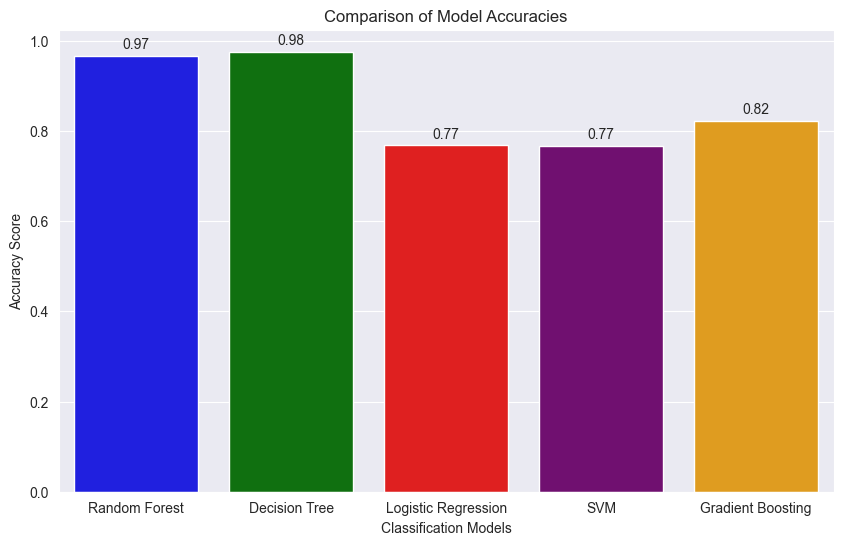

In [29]:
# Colours for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting the accuracies with different colours
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette=colors, hue=list(accuracy_scores.keys()))
plt.ylabel('Accuracy Score')
plt.xlabel('Classification Models')
plt.title('Comparison of Model Accuracies')

# Adding the accuracy score on top of each bar
for i, bar in enumerate(barplot.patches):
    barplot.annotate(format(bar.get_height(), '.2f'), 
                     (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')

plt.show()

# **Conclusion**
Based on all the model results, and from the barchart visualisation above, the decision tree model is the most accurate with it achieving an accuracy score of 0.98. This very accurate score is attributed to its ability to effectively handle the complexity and demands of the dataset, as highlighted by the high precision, recall and F1-Score for both non-diabetic (0) and diabetic (1) classes. The Decision Tree Model also minimised the rate of false positives and negatives as highlighted by the confusion matrix with True negatives = 549, False positives = 13, False negatives = 7 and True positives = 262.

Even though the other models analysed, apart from linear regression which was not suited for the binary prediction, were effective in their own right, they did not perform as well as the decision tree or random forest model for the binary outcome of diabetes. Logistic Regression, Support Vector Machines (SVM) and even the Gradient Boosting Classifier all displayed lower accuracy rates in comparison with limitations in handling the specific data features as evident from their lower performance metrics.

In conclusion, the decision tree model stands out for its exceptional performance in predicting diabetes outcomes, which would be crucial as a detection of this condition. The results from this analysis are important as they demonstrate the feasibility of using machine learning models to predict diabetes outcomes accurately and its balance of other key metrics highlight its potential as a reliable tool in healthcare analysis. And linking back to the analysis problem of "Finding an accurate Machine Learning-Based Analytical Model for the Early Identification of Diabetes Risk Factors in Patients." I have found that the decision tree model is the most accurate and reliable model for predicting diabetes outcomes.


# **References**
Aliyu, L., 2021. Understanding Linear Regression: Predicting Continuous Output Values Based on Input Variables. Medium. Available at: https://lukmanaj.medium.com/understanding-linear-regression-predicting-continuous-output-values-based-on-input-variables-3e78f404492 [Accessed 19 March 2024].

Batista, G.E.A.P.A. and Monard, M.C., 2003. An analysis of four missing data treatment methods for supervised learning. Applied Artificial Intelligence, 17(5-6), pp.519-533.

Beretta, L. and Santaniello, A., 2016. Nearest neighbor imputation algorithms: a critical evaluation. BMC Medical Informatics and Decision Making, 16(Suppl 3), p.74.

Centers for Disease Control and Prevention, 2024. Diabetes Home. Available at: https://www.cdc.gov/diabetes/home/index.html [Accessed 13 March 2024].

Flegal, K.M., et al., 2010. Association of all-cause mortality with overweight and obesity using standard body mass index categories: a systematic review and meta-analysis. JAMA, 309(1), pp.71-82.

García, S., Luengo, J. and Herrera, F., 2015. Data preprocessing in data mining. Springer.

Hruby, A. and Hu, F.B., 2015. The Epidemiology of Obesity: A Big Picture. Pharmacoeconomics, 33(7), pp.673-689. Available at: https://link.springer.com/article/10.1007/s40273-014-0243-x [Accessed 8 March 2024].

Huang, Y., et al., 2007. Hypertension and the risk of type 2 diabetes: the NHANES I Epidemiologic Follow up Study. Journal of Hypertension, 25(12), pp. 2279-2284.

James, G., Witten, D., Hastie, T., and Tibshirani, R., 2013. An Introduction to Statistical Learning: with Applications in R. New York: Springer.

Little, R.J.A. and Rubin, D.B., 2002. Statistical Analysis with Missing Data. Hoboken, NJ: John Wiley & Sons.

Nugroho, A.S., 2021. Implementation of Decision Tree C4.5 Algorithm for Classification of High School Student Knowledge Level. Jurnal Sistem dan Informatika Atma Luhur, [online] 16(1), pp.8-17. Available at: https://jurnal.atmaluhur.ac.id/index.php/sisfokom/article/view/1985/974 [Accessed 3 March 2024].

Prajwala, T.R., et al., 2015. A Comparative Study on Decision Tree and Random Forest Using R Tool. Available at: https://www.researchgate.net/publication/272425234_A_Comparative_Study_on_Decision_Tree_and_Random_Forest_Using_R_Tool [Accessed 1 March 2024].

Sereno, 2022. Comparison of Pearson and Spearman correlation coefficients, *

Analytics Vidhya*. Available at: https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/#:~:text=Pearson%20correlation%3A%20Pearson%20correlation%20evaluates,rather%20than%20the%20raw%20data [Accessed 11 March 2024].

Simental-Mendía, L.E., Castañeda-Chacón, A., Rodríguez-Morán, M., and Guerrero-Romero, F., 2008. The role of glucose and blood pressure control in the onset of diabetes. Journal of Clinical Hypertension, 10(9), pp.707-712.

Skyler, J.S. and Oddo, C., 2009. Diabetes trends in the USA. Diabetes/Metabolism Research and Reviews, 25(S1), S21-S26.

Troyanskaya, O., Cantor, M., Sherlock, G., Brown, P., Hastie, T., Tibshirani, R., Botstein, D. and Altman, R.B., 2001. Missing value estimation methods for DNA microarrays. Bioinformatics, 17(6), pp.520-525.

Whelton, P.K., et al., 2018. 2017 guideline for the prevention, detection, evaluation, and management of high blood pressure in adults. Journal of the American College of Cardiology, 71(19), e127-e248. Available at: https://www.jacc.org/doi/full/10.1016/j.jacc.2017.11.006 [Accessed 13 Mar. 2024].

World Health Organization, 2024. Diabetes. Availa

Xiao, C., Ye, J., Esteves, R. and Rong, C., 2015. Using Spearman's correlation coefficients for exploratory data analysis on big dataset: Using Spearman's Correlation Coefficients for Exploratory Data Analysis. Concurrency and Computation: Practice and Experience, 28, n/a-n/a. Available at: https://onlinelibrary.wiley.com/doi/10.1002/cpe.3745 [Accessed 20 March 2024].
